# Лабораторная работа №6

Постановка задачи:

1. Реализовать алгоритмы Rejection Sampling (Выборка с отклонением) и Metropolis-Hastings (Метрополис-Гастингс),
2. Применить для 2-3 тестовых функций плотности и построить графики семплирования точки и линий уровня.

In [134]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide = 'ignore') 
np.seterr(invalid = 'ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Логнормальное распределение

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<br>
$$
f(x) = e^{\frac{-[(\frac{\ln(x) - μ} {\sigma})^2]} {2}} / (x\sigma \sqrt{2π}),
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;

In [2]:
def LogNormalDistribution(x, sigma = 1, mu = 0):

    if sigma > 0:
        pdf = (np.exp(- (((np.log(x) - mu) / sigma) ** 2) / 2)) / (x * sigma * np.sqrt(2 * np.pi))
    else:
        print('Error! Sigma value must be positive!')
    return pdf

## Логистическое распределение

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<br>
$$
f(x) = \frac{e^{-(x-\mu)/s}} {s(1 + e^{-(x-\mu)/s})},
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;

In [3]:
def LogisticDistribution(x, mu = 2, s = 1):
    if s > 0:
        pdf = np.exp(- ((x - mu) / s)) / (s * ((1 + np.exp(- ((x - mu) / s))) ** 2))
    else:
        print('Error! S value must be positive!')
    return pdf

## Распределение Лапласа

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<br>
$$
f(x) = \frac{\alpha} {2} e^{-\alpha|x-\beta|},
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;

In [4]:
def LaplaceDistribution(x, alpha = 2, beta = 0):

    # alpha - scale parameter (коэффициент масштаба),
    # beta - location parameter (коэффициент сдвига)

    if alpha > 0:
        pdf = (alpha / 2) * np.exp(- alpha * abs(x - beta))
    else:
        print('Error! Alpha value must be positive!')
    return pdf

## Rejection Sampling

**Rejection Sampling (Выборка с отклонением)** — метод, используемый для семплирования сложных вероятностных распределений.

Rejection Sampling алгоритм

1. Взять семпл $x$ по распределению $g(x)$;
2. Выбрать случайное число $u$ равномерно из отрезка $[0,cg(x)]$;
3. Вычислить $f(x)$;
  *   Если $u\leq f(x)$, то $x$ добавляется к семплам;
  *   Если $u>f(x)$, то $x$ отклоняется (отсюда и название метода).

Алгоритм выбирает точки $[x,u]$ равномерно из области под графиком $f(x)$, а это и означает что получаются семплы $f(x)$.

In [5]:
def RejectionSampling(func, num, xmin, xmax, ymax):
    x = np.random.uniform(low = xmin, high = xmax, size = num)
    y = np.random.uniform(low = 0, high = ymax, size = num)

    passed = (y < func(x)).astype(int)

    return x, y, passed

## Metropolis-Hastings Algorithm

**Алгоритм Метрополиса-Гастингса** — алгоритм семплирования, использующийся, в основном, для сложных функций распределения. Он отчасти похож на алгоритм выборки с отклонением (Rejection Sampling), однако здесь вспомогательная функция распределения меняется со временем. 

Алгоритм Метрополиса — Гастингса позволяет семплировать любую функцию распределения. Он основан на создании цепи Маркова, то есть на каждом шаге алгоритма новое выбранное значение $x^{t+1}$ зависит только от предыдущего $x^{t}$. Алгоритм использует вспомогательную функцию распределения $Q(x'|x^{t})$ , зависящую от $x^{t}$, для которой генерировать выборку просто (например, нормальное распределение). На каждом шаге для этой функции генерируется случайное значение $x'$. Затем с вероятностью

$$u={\frac {P(x')Q(x^{t}|x')}{P(x^{t})Q(x'|x^{t})}}$$

(или с вероятностью 1, если $u>1$), выбранное значение принимается как новое: $x^{t+1}=x'$, а иначе оставляется старое: $x^{t+1}=x^{t}$.

In [6]:
def MetropolisHastings(func, num):
    x = []
    x_cur = np.random.rand()
    step = 1

    while step != num:
        x_next = np.random.normal(x_cur)

        a1 = func(x_next) / func(x_cur)
        a2 = np.random.normal(x_next) / x_next

        a = a1 * a2

        if a >= 1:
            x.append(x_next)
            x_cur = x_next
        elif a < 1:
            if a > 1 - a:
                x.append(x_next)
                x_cur = x_next
            else:
                x.append(x_cur)
        step += 1
    return x

## Визуализация

### Rejection Sampling Visualization

In [99]:
def RejectionVisualization(func, num, x_points, y_points, passed_points, xmin, xmax, ymin, ymax, func_name):
    x = np.linspace(xmin, xmax, num)
    y = func(x)

    plt.figure(figsize = (10, 7))

    plt.plot(x, y, label = func_name + ' function')
    plt.hist(x_points[passed_points == 1], 30, label = 'Sample distribution', density = True, color = 'green', alpha = 0.4)
    plt.fill_between(x, y, 0, alpha = 0.2)
    plt.scatter(x_points, y_points, c = passed_points, cmap = 'RdYlGn', s = 5)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    plt.title('Rejection Sampling', fontsize = 16)
    plt.xlabel('x', fontsize = 12)
    plt.ylabel('f(x)', fontsize = 12)
    plt.legend(loc = 'upper right', facecolor = 'white', framealpha = 1, fontsize = 14)
    plt.show()

### Metropolis-Hastings Algorithm Visualization

In [100]:
def MetrHastVisualization(func, num, x_mnVals, xmin, xmax, ymin, ymax, func_name):
    x = np.linspace(xmin, xmax, num)
    y = func(x)

    plt.figure(figsize = (10, 7))

    plt.plot(x, y, label = func_name + ' function')
    plt.hist(x_mnVals, 30, density = True, label = 'Sample distribution', color = 'green', alpha = 0.4)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    plt.title('Metropolis-Hastings', fontsize = 16)
    plt.xlabel('x', fontsize = 12)
    plt.ylabel('f(x)', fontsize = 12)
    plt.legend(loc = 'upper right', facecolor = 'white', framealpha = 1, fontsize = 14)
    plt.show()

## Логнормальное распределение
#### Rejection Sampling

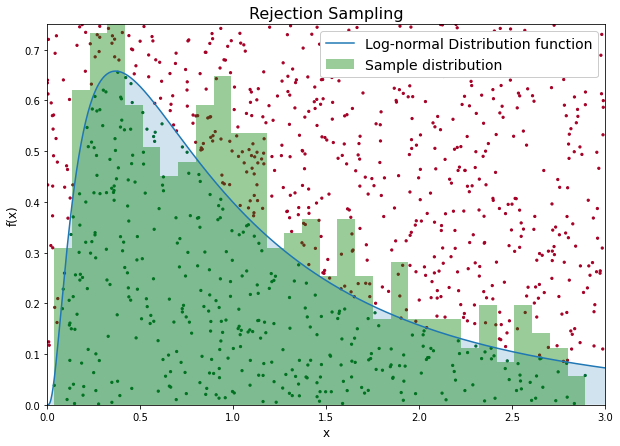

In [101]:
points = 1000
x_min = 0 
x_max = 3
y_min = 0
y_max = 0.75

x_val, y_val, passed_points = RejectionSampling(LogNormalDistribution, points, x_min, x_max, y_max)
RejectionVisualization(LogNormalDistribution, points, x_val, y_val, passed_points, x_min, x_max, y_min, y_max, 'Log-normal Distribution')

#### Metropolis-Hastings Algorithm

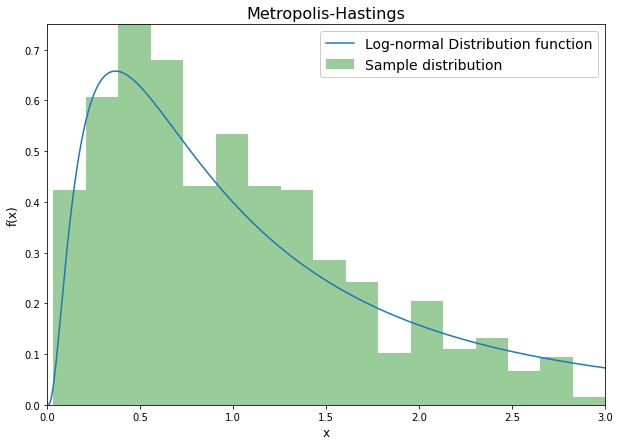

In [119]:
x_vals = MetropolisHastings(LogNormalDistribution, points)
MetrHastVisualization(LogNormalDistribution, points, x_vals, x_min, x_max, y_min, y_max, 'Log-normal Distribution')

## Логистическое распределение
#### Rejection Sampling

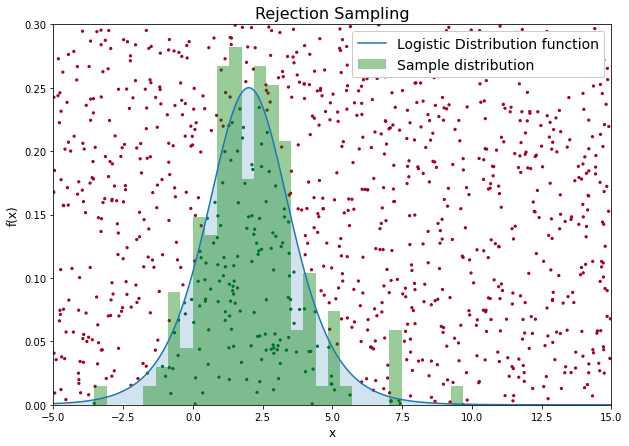

In [127]:
points = 1000
x_min = -5
x_max = 15
y_min = 0
y_max = 0.3

x_val, y_val, passed_points = RejectionSampling(LogisticDistribution, points, x_min, x_max, y_max)
RejectionVisualization(LogisticDistribution, points, x_val, y_val, passed_points, x_min, x_max, y_min, y_max, 'Logistic Distribution')

#### Metropolis-Hastings Algorithm

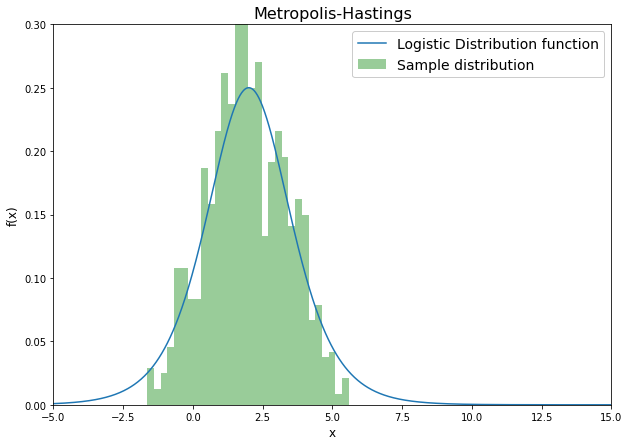

In [128]:
x_vals = MetropolisHastings(LogisticDistribution, points)
MetrHastVisualization(LogisticDistribution, points, x_vals, x_min, x_max, y_min, y_max, 'Logistic Distribution')

## Распределение Лапласа
#### Rejection Sampling

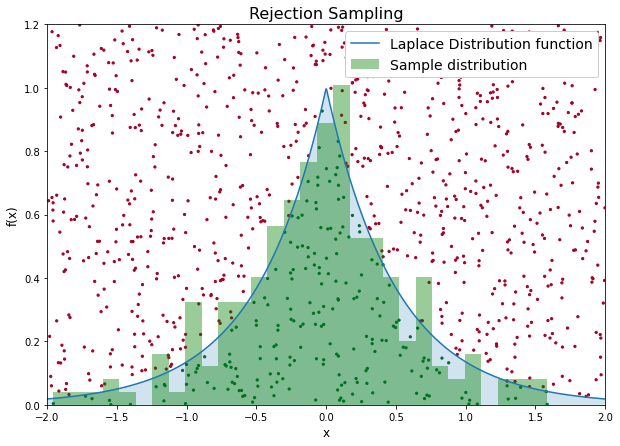

In [131]:
points = 1000
x_min = -2
x_max = 2
y_min = 0
y_max = 1.2

x_val, y_val, passed_points = RejectionSampling(LaplaceDistribution, points, x_min, x_max, y_max)
RejectionVisualization(LaplaceDistribution, points, x_val, y_val, passed_points, x_min, x_max, y_min, y_max, 'Laplace Distribution')

#### Metropolis-Hastings Algorithm

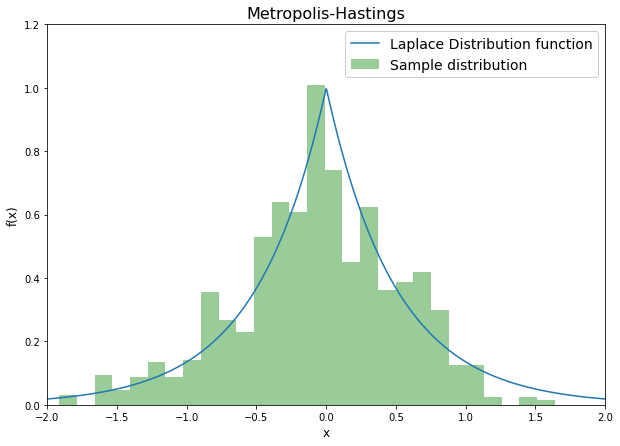

In [133]:
x_vals = MetropolisHastings(LaplaceDistribution, points)
MetrHastVisualization(LaplaceDistribution, points, x_vals, x_min, x_max, y_min, y_max, 'Laplace Distribution')